In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlxtend
import seaborn as sns
 

In [3]:
df = pd.read_csv("SeattleWeather.csv")
df.shape

(25551, 5)

In [4]:
df.head(5)

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [7]:
df['Target'] = df.RAIN.map(lambda x: 1 if x == True else 0)
df.sample(5)

,DATE,PRCP,TMAX,TMIN,RAIN,Target
21182,2005-12-29,0.35,50,42,True,1
13914,1986-02-04,0.35,50,43,True,1
23599,2012-08-11,0.00,83,56,False,0
1424,1951-11-25,0.52,52,39,True,1
14079,1986-07-19,0.00,78,57,False,0


In [8]:
X = df[['TMAX','TMIN']].to_numpy()
y = df['Target'].to_numpy()

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=5, stratify=y)

In [10]:
print(np.bincount(y))
print(np.bincount(y_test))
print(np.bincount(y_train))

[14651 10900]
[4396 3270]
[10255  7630]


In [14]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 10000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [15]:
y_train_predProb = logreg.predict_proba(X_train)
y_test_predProb = logreg.predict_proba(X_test)

print('Train predictions for probabilities:\n\n', y_train_predProb[:10],'\n')
print('Test predictions for probabilities:\n\n', y_test_predProb[:10],'\n')

Train predictions for probabilities:

 [[0.35200235 0.64799765]
 [0.27914158 0.72085842]
 [0.3754818  0.6245182 ]
 [0.57136727 0.42863273]
 [0.28273223 0.71726777]
 [0.56118126 0.43881874]
 [0.94079212 0.05920788]
 [0.70589034 0.29410966]
 [0.58293434 0.41706566]
 [0.57860667 0.42139333]] 

Test predictions for probabilities:

 [[0.18759701 0.81240299]
 [0.62558754 0.37441246]
 [0.89429299 0.10570701]
 [0.45018567 0.54981433]
 [0.90953247 0.09046753]
 [0.32938401 0.67061599]
 [0.40222626 0.59777374]
 [0.40222626 0.59777374]
 [0.51537772 0.48462228]
 [0.64751446 0.35248554]] 



In [16]:
y_train_pred = y_train_predProb.argmax(axis=1)  # Finding the predicted class for train predictions
y_test_pred = y_test_predProb.argmax(axis=1)  # Finding the predicted class for test predictions

# Presenting the predicted classes for the 1st 10 instances of train

print('Predicted class for train: ', y_train_pred[:10],'\n')     

# Presenting the predicted classes for the 1st 10 instances of test

print('Predicted class for train: ', y_test_pred[:10])

Predicted class for train:  [1 1 1 0 1 0 0 0 0 0] 

Predicted class for train:  [1 0 0 1 0 1 1 1 0 0]


In [17]:
from sklearn import metrics

train_score = metrics.accuracy_score(y_train,y_train_pred)
test_score =  metrics.accuracy_score(y_test, y_test_pred)

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.74895 

Test accuracy score of the model is  0.7575


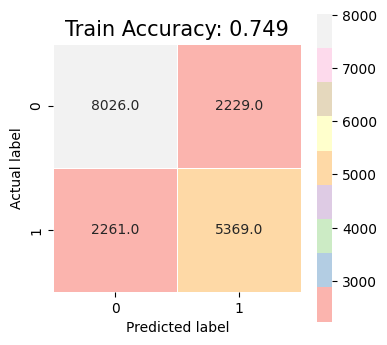

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.78      0.78      0.78     10255
           1       0.71      0.70      0.71      7630

    accuracy                           0.75     17885
   macro avg       0.74      0.74      0.74     17885
weighted avg       0.75      0.75      0.75     17885



In [18]:
from sklearn.metrics import confusion_matrix,classification_report

train_c_matrix = confusion_matrix(y_train,y_train_pred)

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix,annot=True,fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score,4))
plt.title(all_sample_title, size = 15);
plt.show()

print('Classification Report for the Train Subset: \n\n', classification_report(y_train, y_train_pred))

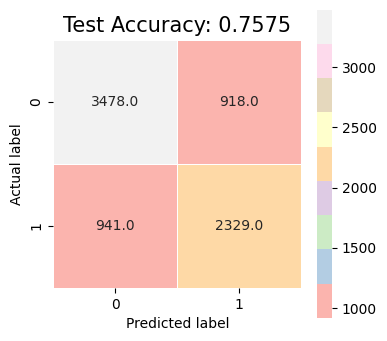

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.79      0.79      0.79      4396
           1       0.72      0.71      0.71      3270

    accuracy                           0.76      7666
   macro avg       0.75      0.75      0.75      7666
weighted avg       0.76      0.76      0.76      7666



In [19]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

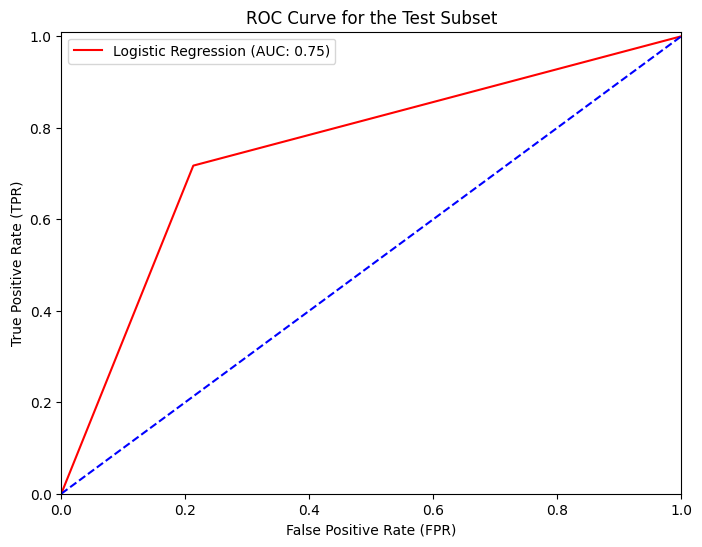

In [20]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

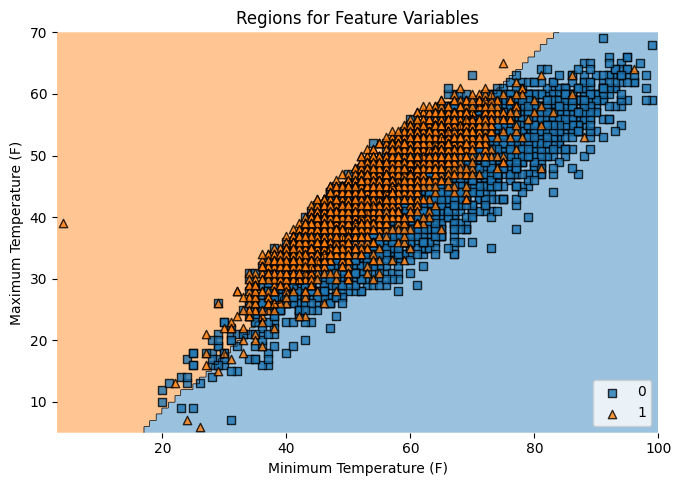

In [21]:
# Plotting the decision regions

from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=logreg) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('Minimum Temperature (F)')
plt.ylabel('Maximum Temperature (F)') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

## 0: No Rain
## 1: Rain